In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 📌 Extracción

In [170]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
df_raw = pd.read_json(url)

# Verificacion de datos

In [171]:
df_raw.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [172]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


# 🔧 Transformación

In [173]:
df = df_raw.copy()

In [174]:
normalize_columns = [
    col for col in df.columns if df[col].apply(lambda x: isinstance(x, dict)).any()
]

In [175]:
for col in normalize_columns:
    normalize_df = pd.json_normalize(df[col]).add_prefix(f"{col}_")
    df = df.drop(columns=[col]).reset_index(drop=True)
    df = pd.concat([df, normalize_df.reset_index(drop=True)], axis=1)

In [177]:
df.sample(10)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
5729,7825-GKXMW,Yes,Female,0,No,No,1,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,No,Electronic check,45.80,45.8
6089,8319-QBEHW,No,Male,0,No,Yes,26,No,No phone service,DSL,...,Yes,No,No,Yes,No,One year,Yes,Bank transfer (automatic),39.95,1023.75
2392,3339-EAQNV,No,Male,1,Yes,No,72,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,Yes,One year,Yes,Credit card (automatic),97.25,7133.1
5152,7029-IJEJK,No,Female,0,No,No,54,No,No phone service,DSL,...,No,No,Yes,No,Yes,One year,No,Bank transfer (automatic),44.10,2369.7
4413,6039-RVSJV,,Female,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.85,19.85
4964,6778-EICRF,No,Male,0,Yes,Yes,24,Yes,Yes,DSL,...,No,No,No,Yes,Yes,One year,No,Mailed check,74.80,1821.2
5276,7206-GZCDC,Yes,Female,1,No,No,1,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.25,69.25
4642,6358-LYNGM,Yes,Male,0,No,No,1,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.90,74.9
1481,2123-VSCOT,No,Female,0,Yes,Yes,59,Yes,Yes,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),72.10,4194.85
4962,6776-TLWOI,Yes,Male,0,No,No,3,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.85,64.55


In [178]:
df.columns = df.columns.str.upper().str.replace(".", "_")

In [179]:
df.sample(3)

,CUSTOMERID,CHURN,CUSTOMER_GENDER,CUSTOMER_SENIORCITIZEN,CUSTOMER_PARTNER,CUSTOMER_DEPENDENTS,CUSTOMER_TENURE,PHONE_PHONESERVICE,PHONE_MULTIPLELINES,INTERNET_INTERNETSERVICE,...,INTERNET_ONLINEBACKUP,INTERNET_DEVICEPROTECTION,INTERNET_TECHSUPPORT,INTERNET_STREAMINGTV,INTERNET_STREAMINGMOVIES,ACCOUNT_CONTRACT,ACCOUNT_PAPERLESSBILLING,ACCOUNT_PAYMENTMETHOD,ACCOUNT_CHARGES_MONTHLY,ACCOUNT_CHARGES_TOTAL
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
963,1353-LJWEM,No,Male,0,No,No,11,Yes,No,DSL,...,Yes,Yes,Yes,No,No,Month-to-month,Yes,Electronic check,60.90,688.5
7205,9912-OMZDS,No,Female,0,Yes,Yes,59,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,106.15,6256.2


## Estandarización y Transformación de Datos (opcional)

In [180]:
df["CHURN"].unique()

array(['No', 'Yes', ''], dtype=object)

In [181]:
df["CHURN"] = df["CHURN"].replace("", np.nan)
df["CHURN"] = df["CHURN"].replace({"Yes": "1", "No": "0"})

In [182]:
df.sample(3)

,CUSTOMERID,CHURN,CUSTOMER_GENDER,CUSTOMER_SENIORCITIZEN,CUSTOMER_PARTNER,CUSTOMER_DEPENDENTS,CUSTOMER_TENURE,PHONE_PHONESERVICE,PHONE_MULTIPLELINES,INTERNET_INTERNETSERVICE,...,INTERNET_ONLINEBACKUP,INTERNET_DEVICEPROTECTION,INTERNET_TECHSUPPORT,INTERNET_STREAMINGTV,INTERNET_STREAMINGMOVIES,ACCOUNT_CONTRACT,ACCOUNT_PAPERLESSBILLING,ACCOUNT_PAYMENTMETHOD,ACCOUNT_CHARGES_MONTHLY,ACCOUNT_CHARGES_TOTAL
2193,3070-BDOQC,0,Female,0,No,No,60,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Two year,Yes,Electronic check,99.65,5941.05
5475,7503-ZGUZJ,1,Male,0,No,No,1,Yes,Yes,Fiber optic,...,No,No,No,Yes,No,Month-to-month,Yes,Mailed check,84.65,84.65
4745,6502-MJQAE,1,Male,0,No,No,1,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.6


In [183]:
binary_cols = [
    "CUSTOMER_PARTNER",
    "CUSTOMER_DEPENDENTS",
    "PHONE_PHONESERVICE",
    "ACCOUNT_PAPERLESSBILLING",
]

In [184]:
for col in binary_cols:
    print(f"The column: {col} has the following values: {df[col].unique()}")

The column: CUSTOMER_PARTNER has the following values: ['Yes' 'No']
The column: CUSTOMER_DEPENDENTS has the following values: ['Yes' 'No']
The column: PHONE_PHONESERVICE has the following values: ['Yes' 'No']
The column: ACCOUNT_PAPERLESSBILLING has the following values: ['Yes' 'No']


In [185]:
for col in binary_cols:
    df[col] = df[col].apply(lambda x: 1 if x == "Yes" else 0)

In [186]:
df.sample(5)

,CUSTOMERID,CHURN,CUSTOMER_GENDER,CUSTOMER_SENIORCITIZEN,CUSTOMER_PARTNER,CUSTOMER_DEPENDENTS,CUSTOMER_TENURE,PHONE_PHONESERVICE,PHONE_MULTIPLELINES,INTERNET_INTERNETSERVICE,...,INTERNET_ONLINEBACKUP,INTERNET_DEVICEPROTECTION,INTERNET_TECHSUPPORT,INTERNET_STREAMINGTV,INTERNET_STREAMINGMOVIES,ACCOUNT_CONTRACT,ACCOUNT_PAPERLESSBILLING,ACCOUNT_PAYMENTMETHOD,ACCOUNT_CHARGES_MONTHLY,ACCOUNT_CHARGES_TOTAL
6877,9489-JMTTN,0,Female,0,1,1,72,1,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,0,Credit card (automatic),89.75,6595.9
4730,6480-YAGIY,0,Male,0,0,0,45,1,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,One year,0,Credit card (automatic),112.20,5031.85
4095,5609-CEBID,1,Female,1,0,0,20,1,Yes,Fiber optic,...,Yes,Yes,No,No,Yes,Month-to-month,1,Electronic check,94.10,1782.4
4646,6365-MTGZX,1,Male,0,0,0,24,1,No,Fiber optic,...,No,No,Yes,Yes,Yes,Month-to-month,1,Electronic check,96.00,2122.45
5162,7044-YAACC,0,Male,1,1,0,4,1,No,Fiber optic,...,No,No,No,No,No,Month-to-month,1,Electronic check,70.20,280.35


In [187]:
df.dtypes

CUSTOMERID                    object
CHURN                         object
CUSTOMER_GENDER               object
CUSTOMER_SENIORCITIZEN         int64
CUSTOMER_PARTNER               int64
CUSTOMER_DEPENDENTS            int64
CUSTOMER_TENURE                int64
PHONE_PHONESERVICE             int64
PHONE_MULTIPLELINES           object
INTERNET_INTERNETSERVICE      object
INTERNET_ONLINESECURITY       object
INTERNET_ONLINEBACKUP         object
INTERNET_DEVICEPROTECTION     object
INTERNET_TECHSUPPORT          object
INTERNET_STREAMINGTV          object
INTERNET_STREAMINGMOVIES      object
ACCOUNT_CONTRACT              object
ACCOUNT_PAPERLESSBILLING       int64
ACCOUNT_PAYMENTMETHOD         object
ACCOUNT_CHARGES_MONTHLY      float64
ACCOUNT_CHARGES_TOTAL         object
dtype: object

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CUSTOMERID                 7267 non-null   object 
 1   CHURN                      7043 non-null   object 
 2   CUSTOMER_GENDER            7267 non-null   object 
 3   CUSTOMER_SENIORCITIZEN     7267 non-null   int64  
 4   CUSTOMER_PARTNER           7267 non-null   int64  
 5   CUSTOMER_DEPENDENTS        7267 non-null   int64  
 6   CUSTOMER_TENURE            7267 non-null   int64  
 7   PHONE_PHONESERVICE         7267 non-null   int64  
 8   PHONE_MULTIPLELINES        7267 non-null   object 
 9   INTERNET_INTERNETSERVICE   7267 non-null   object 
 10  INTERNET_ONLINESECURITY    7267 non-null   object 
 11  INTERNET_ONLINEBACKUP      7267 non-null   object 
 12  INTERNET_DEVICEPROTECTION  7267 non-null   object 
 13  INTERNET_TECHSUPPORT       7267 non-null   objec

In [189]:
df.isnull().sum()

CUSTOMERID                     0
CHURN                        224
CUSTOMER_GENDER                0
CUSTOMER_SENIORCITIZEN         0
CUSTOMER_PARTNER               0
CUSTOMER_DEPENDENTS            0
CUSTOMER_TENURE                0
PHONE_PHONESERVICE             0
PHONE_MULTIPLELINES            0
INTERNET_INTERNETSERVICE       0
INTERNET_ONLINESECURITY        0
INTERNET_ONLINEBACKUP          0
INTERNET_DEVICEPROTECTION      0
INTERNET_TECHSUPPORT           0
INTERNET_STREAMINGTV           0
INTERNET_STREAMINGMOVIES       0
ACCOUNT_CONTRACT               0
ACCOUNT_PAPERLESSBILLING       0
ACCOUNT_PAYMENTMETHOD          0
ACCOUNT_CHARGES_MONTHLY        0
ACCOUNT_CHARGES_TOTAL          0
dtype: int64

## Columna de Ingresos diarios

In [190]:
df["DAILY_CHARGES"] = df["ACCOUNT_CHARGES_MONTHLY"] / 30
df["DAILY_CHARGES"] = df["DAILY_CHARGES"].round(2)

In [191]:
df.sample(5)

,CUSTOMERID,CHURN,CUSTOMER_GENDER,CUSTOMER_SENIORCITIZEN,CUSTOMER_PARTNER,CUSTOMER_DEPENDENTS,CUSTOMER_TENURE,PHONE_PHONESERVICE,PHONE_MULTIPLELINES,INTERNET_INTERNETSERVICE,...,INTERNET_DEVICEPROTECTION,INTERNET_TECHSUPPORT,INTERNET_STREAMINGTV,INTERNET_STREAMINGMOVIES,ACCOUNT_CONTRACT,ACCOUNT_PAPERLESSBILLING,ACCOUNT_PAYMENTMETHOD,ACCOUNT_CHARGES_MONTHLY,ACCOUNT_CHARGES_TOTAL,DAILY_CHARGES
5646,7711-GQBZC,0,Female,0,1,1,71,1,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Bank transfer (automatic),24.70,1810.55,0.82
838,1194-BHJYC,0,Male,0,1,0,61,0,No phone service,DSL,...,Yes,Yes,Yes,Yes,Two year,1,Mailed check,62.15,3778.85,2.07
5802,7932-WPTDS,1,Female,1,1,0,1,0,No phone service,DSL,...,No,No,No,No,Month-to-month,1,Electronic check,24.80,24.8,0.83
5647,7711-YIJWC,0,Male,0,1,1,61,1,No,DSL,...,Yes,Yes,Yes,Yes,One year,0,Bank transfer (automatic),84.90,5264.5,2.83
4220,5802-ADBRC,0,Female,0,1,0,50,1,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,1,Mailed check,104.40,5232.9,3.48


In [192]:
df_copy = df.copy()

## 📊 Carga y análisis

In [193]:
df_churn = df["CHURN"].value_counts()

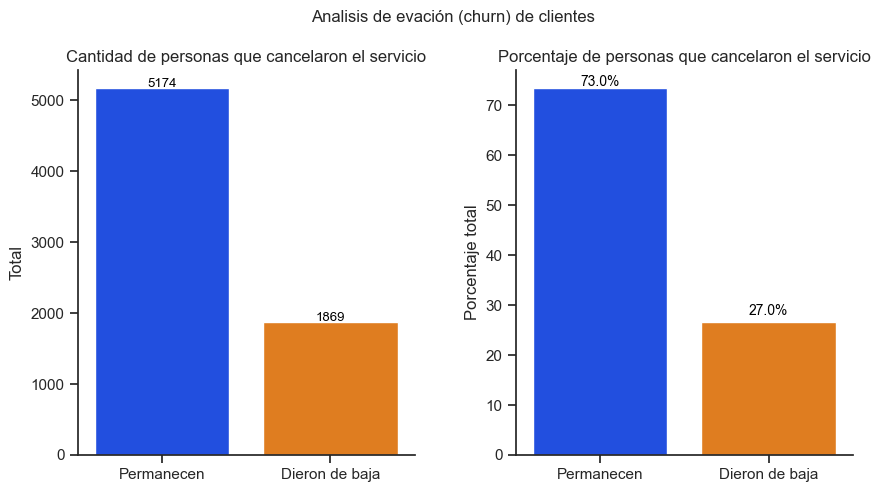

In [194]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Analisis de evación (churn) de clientes", y=1, fontsize=12)
fig.subplots_adjust(hspace=0.5, wspace=0.3)


# Gráfica de evacion con representacion numérica
sns.barplot(
    x=df_churn.index, y=df_churn.values, hue=df_churn.index, ax=ax[0], palette="bright"
)
ax[0].set_title("Cantidad de personas que cancelaron el servicio")
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(["Permanecen", "Dieron de baja"])
ax[0].set_ylabel("Total")
ax[0].set_xlabel("")

for i, j in enumerate(df_churn.values):
    ax[0].text(i, j + 20, str(j), color="black", fontsize=9.5, ha="center")


# Gráfica de bajas con representacion porcentual
sns.barplot(
    x=df_churn.index,
    y=(df_churn.values / (df_churn.values.sum()) * 100),
    hue=df_churn.index,
    ax=ax[1],
    palette="bright",
)
ax[1].set_title("Porcentaje de personas que cancelaron el servicio")
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(["Permanecen", "Dieron de baja"])
ax[1].set_ylabel("Porcentaje total")
ax[1].set_xlabel("")

for i, j in enumerate((df_churn.values / (df_churn.values.sum()) * 100).round(0)):
    ax[1].text(i, j + 1, str(f"{j}%"), color="black", fontsize=10, ha="center")

# #Mostramos gráficas
plt.show()

## Recuento de evasión por variables categóricas

In [195]:
df_copy["ACCOUNT_CONTRACT"].value_counts()

ACCOUNT_CONTRACT
Month-to-month    4005
Two year          1743
One year          1519
Name: count, dtype: int64

In [196]:
df_copy.sample(5)

,CUSTOMERID,CHURN,CUSTOMER_GENDER,CUSTOMER_SENIORCITIZEN,CUSTOMER_PARTNER,CUSTOMER_DEPENDENTS,CUSTOMER_TENURE,PHONE_PHONESERVICE,PHONE_MULTIPLELINES,INTERNET_INTERNETSERVICE,...,INTERNET_DEVICEPROTECTION,INTERNET_TECHSUPPORT,INTERNET_STREAMINGTV,INTERNET_STREAMINGMOVIES,ACCOUNT_CONTRACT,ACCOUNT_PAPERLESSBILLING,ACCOUNT_PAYMENTMETHOD,ACCOUNT_CHARGES_MONTHLY,ACCOUNT_CHARGES_TOTAL,DAILY_CHARGES
1793,2550-AEVRU,0,Female,0,1,1,57,1,No,DSL,...,No,No,No,No,One year,0,Electronic check,53.45,3053,1.78
1336,1930-BZLHI,0,Male,0,0,0,21,1,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,1,Mailed check,20.35,422.7,0.68
6681,9189-JWSHV,1,Female,1,1,0,24,1,Yes,Fiber optic,...,No,No,Yes,Yes,Month-to-month,1,Electronic check,93.55,2264.05,3.12
5487,7520-HQWJU,0,Female,0,1,1,66,1,Yes,DSL,...,Yes,No,No,No,Month-to-month,1,Bank transfer (automatic),67.45,4508.65,2.25
5615,7665-VIGUD,0,Male,0,0,0,10,1,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,0,Mailed check,20.35,176.3,0.68


In [198]:
df_copy.rename(
    columns={
        "CUSTOMER_GENDER": "GENDER",
        "ACCOUNT_PAYMENTMETHOD": "PAYMENT_METHOD",
        "ACCOUNT_CONTRACT": "CONTRACT_TYPE",
        "INTERNET_INTERNETSERVICE": "INTERNET_SERVICE",
        "CUSTOMER_SENIORCITIZEN": "SENIOR_CITIZEN",
        "CUSTOMER_TENURE": "TENURE",
    },
    inplace=True,
)

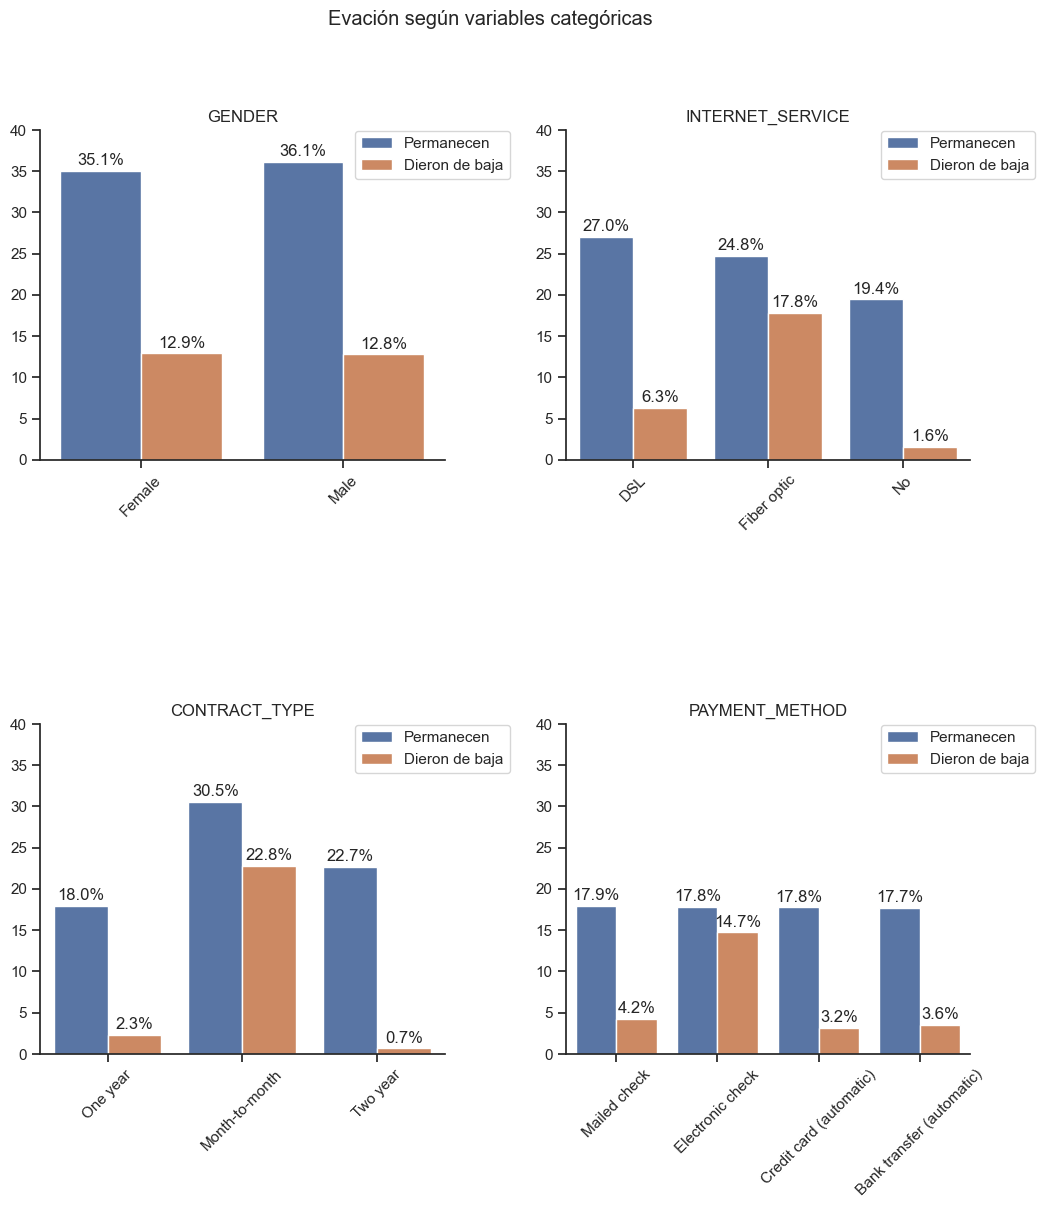

In [207]:
categoric_cols = [
    "GENDER",
    "INTERNET_SERVICE",
    "CONTRACT_TYPE",
    "PAYMENT_METHOD",
]

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
fig.subplots_adjust(hspace=0.8, wspace=0.3)
fig.suptitle("Evación según variables categóricas")
axs = axs.flatten()

for i, var in enumerate(categoric_cols):
    ax = axs[i]
    ax = sns.countplot(
        data=df_copy, x=var, hue="CHURN", stat="percent", ax=ax, palette="deep"
    )
    custom_params = {"axes.spines.right": False, "axes.spines.top": False}
    sns.set_theme(style="ticks", rc=custom_params)
    ax.set_title(f"{var}")
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_ylim(0, 40)
    ax.tick_params(axis="x", rotation=45)
    ax.legend(["Permanecen", "Dieron de baja"], bbox_to_anchor=(1.18, 1.02))

    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", padding=2)

plt.show()

## Recuento de evasión por variables numéricas

In [208]:
df_copy.rename(
    columns={
        "ACCOUNT_CHARGES_TOTAL": "TOTAL_CHARGES",
        "ACCOUNT_CHARGES_MONTHLY": "MONTHLY_CHARGES",
    },
    inplace=True,
)

In [167]:
numeric_cols = ["TOTAL_CHARGES", "MONTHLY_CHARGES", "DAILY_CHARGES"]

In [168]:
# For para generación de las graficas tipo box
for i in numeric_cols:
    fig = px.box(
        df_copy, x="CHURN", y=df_copy[i], points="all", color="CHURN", notched=True
    )

    fig.update_layout(
        width=800,
        height=450,
        title=dict(
            text=f"Analisis de bajas por {i} total de clientes", x=0.5, xanchor="center"
        ),
        xaxis_title="",
        yaxis_title="Total",
        font_family="Arial",
        font_size=20,
        font_color="black",
        xaxis=dict(tickvals=[0, 1], ticktext=["Permanecen", "Baja"]),
        showlegend=False,
    )

    fig.show()

# 📄Informe final

## 🔎 Exploración y Resultados
Tras analizar los datos y visualizar su comportamiento, se identificaron varios factores relevantes que inciden en la pérdida de clientes del servicio:

- **Pérdida significativa de clientes habituales:** Casi el **30% de los usuarios recurrentes** han dejado el servicio, representando un impacto importante en la base de clientes.

- **El género no influye significativamente:** Las tasas de cancelación entre hombres y mujeres son equivalentes, por lo que **no es una variable clave** en la retención.

- **Tipo de contrato y forma de pago como factores críticos:**
  - Los clientes con **contratos mensuales** son los más propensos a abandonar.
  - Aquellos que **pagan mediante cheque electrónico no automatizado** también presentan mayores tasas de cancelación.

- **Patrones de gasto:**
  - En el gasto **anual**, se observa una estabilización en la pérdida de clientes al superar los **$3000 USD**.
  - En el gasto **mensual**, las cancelaciones aumentan al alcanzar los **$70 USD**, lo que sugiere un umbral sensible para el usuario.

---

## 💡 Recomendaciones

Con base en los hallazgos anteriores, se proponen las siguientes estrategias para mejorar la retención de clientes:

### 1. Optimizar los contratos mensuales

El contrato mensual, utilizado generalmente como plan de prueba, tiene la mayor tasa de abandono. Para convertirlo en una vía de fidelización, se recomienda:

- Ofrecer **descuentos** a nuevos clientes durante sus primeros meses.
- **Agregar valor** al plan con beneficios adicionales.
- Promover la **migración** a contratos anuales mediante incentivos.

### 2. Fomentar métodos de pago automatizados

Los métodos de pago automáticos están correlacionados con menor abandono. Se sugiere:

- Implementar campañas para **educar y migrar** a los clientes a medios automatizados.
- Simplificar el proceso de **activación de pagos recurrentes**.
- Utilizar recordatorios y notificaciones personalizadas.

### 3. Mejorar el servicio de fibra óptica

Los usuarios de **internet por fibra óptica** son quienes más cancelan el servicio. Esto puede indicar una insatisfacción técnica o expectativas no cumplidas. Acciones sugeridas:

- Ejecutar **encuestas de satisfacción específicas** para este segmento.
- Verificar el cumplimiento de la **velocidad y estabilidad contratada**.
- Reforzar la **infraestructura técnica** y la atención al cliente especializada en este servicio.

---

## ✅ Conclusión

Los principales factores de pérdida de clientes están relacionados con la **experiencia del servicio**, más que con el personal o la estructura operativa.

Por tanto, se recomienda:

- Desarrollar **estrategias de bienvenida** para nuevos clientes que los motiven a permanecer más allá del contrato mensual.
- Promover el uso de **pagos digitales automáticos** como estándar.
- Revisar profundamente el **desempeño del servicio de fibra óptica**, corrigiendo cualquier deficiencia técnica o de atención.

Aplicando estas recomendaciones, se espera lograr una **mejor retención**, reducir la tasa de cancelación y fortalecer la relación a largo plazo con los usuarios.

---
